<h4>機械学習のアルゴリズムのトレーニング 主要な5steps</h4>
<ol>
    <li>特徴量を選択する</li>
    <li>性能指標を選択する</li>
    <li>分類器と最適化アルゴリズムを選択する</li>
    <li>モデルの性能を評価する </li>
    <li>アルゴリズムを調整する</li>
</ol>

In [1]:
#import
from sklearn import datasets
import numpy as np
#iris data
iris=datasets.load_iris()

<p>150のサンプルから「がくの長さ」と「花びらの長さ」を抽出する。それをXに代入し、対応する品種のクラスラベルをベクトルYに代入する</p>

In [2]:
x=iris.data[: , [2,3]]
y=iris.target

<p>トレーニングセットとテストセットに分割する。</p>

In [3]:
from sklearn.cross_validation import train_test_split

#20%→Test data 80%→Train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

/Users/watanabesouta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p>最適な性能を得るために特徴量のスクリーニングが必要となる。scikit-learnのpreprocessingモジュールのStandardScalerクラスを使って特徴量を標準化する。</p>

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fitメソッドを呼び出すことによって、トレーニングデータから平均値と標準偏差を推定。
sc.fit(x_train)
#平均と標準偏差を用いて標準化
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
#トレーニングデータセットを標準化したところでパーセプトロンモデルをトレーニングできる状態になる。

In [9]:
from sklearn.linear_model import Perceptron
#エポック数40、学習率0.1でパーセプトロンのインスタンスを生成。
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)

#トレーニングにモデルを適合させる
ppn.fit(x_train_std, y_train)

/Users/watanabesouta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
#上記のトレーニングを行った後は、テストデータでpredictメソッドを使って予測変換をすることができる。
y_pred=ppn.predict(x_test_std)

#誤分類のサンプル数を表示する。
print("Misclassfied samples: %d" % (y_test != y_pred).sum())

Misclassfied samples: 2


In [35]:
#可視化のための下準備
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(x,y, classifier, test_idx=None, resolution=0.02):
    #マーカーとカラーマップの準備
    markers=("s","x","o","^","v")
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    
    #等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0], y=x[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    #テストサンプルをめだたせる
    if test_idx:
        x_test, y_test=x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:,0], x_test[:,1],c="", alpha=1.0, linewidths=1, marker="o", s=55, label="test set")

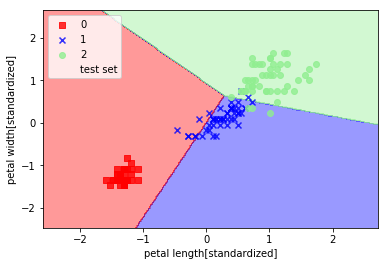

In [39]:
#トレーニングデータとテストデータの結合
x_combined_std=np.vstack((x_train_std, x_test_std))

#トレーニングデータとテストデータのクラスラベルを結合
y_combined=np.hstack((y_train, y_test))

#決定境界のプロット
plot_decision_regions(x=x_combined_std, y=y_combined, classifier=ppn,test_idx=range(105,150))

#軸ラベルの設定
plt.xlabel("petal length[standardized]")
plt.ylabel("petal width[standardized]")

#凡例の設定
plt.legend(loc="upper left")

plt.show()

In [ ]:
#sklearnのadditionalな情報
http://scikit-learn.org/stable/